In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('./BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# (A)

In [3]:
features = df.drop('medv',axis=1)
target = df.medv

In [4]:
rf = RandomForestRegressor(n_estimators=500,n_jobs=-1,max_depth=20,oob_score=True)
rf.fit(features,target)
print('train R2',rf.score(features,target).round(3))
print('out of bag R2', rf.oob_score_.round(3))

train R2 0.984
out of bag R2 0.879


# (B)

In [5]:
feature_importances = pd.Series(rf.feature_importances_,index=features.columns)
feature_importances.sort_values(ascending=False)

rm         0.415299
lstat      0.389486
dis        0.068210
crim       0.037464
nox        0.022228
ptratio    0.016431
tax        0.014537
age        0.013531
black      0.011141
indus      0.006458
rad        0.003366
zn         0.001038
chas       0.000811
dtype: float64

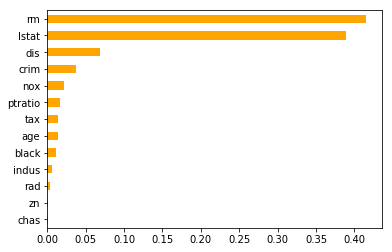

In [7]:
feature_importances.sort_values().plot.barh(color='orange')